In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("C:/AI/DL/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
# 사용할 활동 필터링
data = df[df['activity'].isin(['sitting', 'lyingRigh', 'lyingBack'])]
data = data.drop('people', axis=1)
data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.3424,-9.42070,0.000242,...,9.195642e-05,0.009589,0.401254,-0.410987,-0.382210,-0.446050,9.935077e-05,0.009967,-0.597598,lyingRigh
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.3657,-9.43560,0.000156,...,7.375030e-05,0.008588,0.147180,-0.411248,-0.365810,-0.436760,8.659481e-05,0.009306,1.021454,lyingRigh
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.3628,-9.43130,0.000214,...,3.380089e-05,0.005814,0.032341,-0.409787,-0.379260,-0.434310,7.258946e-05,0.008520,0.431012,lyingRigh
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.3649,-9.45390,0.000257,...,9.044032e-05,0.009510,0.409508,-0.409101,-0.360740,-0.440870,1.127801e-04,0.010620,1.368666,lyingRigh


In [4]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
data['activity'] = label_encoder.fit_transform(data['activity'])

data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,2
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,2
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,2
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,2
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,2


In [5]:
# 정상 데이터와 비정상 데이터 통합
data.loc[data['activity'].isin([0, 1]), 'activity'] = 0  # lyingRigh(1)과 lyingBack(0)을 모두 0으로
data.loc[data['activity'] == 2, 'activity'] = 1  # sitting을 1로

In [6]:
data['activity'].value_counts()

activity
0    960
1    480
Name: count, dtype: int64

In [7]:
# 데이터 정규화
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])  # 'activity' 열 제외하고 정규화

In [8]:
X = data.drop('activity', axis=1)
X.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,1.168376,1.179659,1.134716,0.424899,1.794701,-0.037407,1.064111,1.057739,1.076760,-0.084875,...,-0.025631,-0.135903,-0.337940,0.344190,0.054259,0.047582,0.061705,-0.137386,-0.365251,0.185769
1,1.168870,1.182732,1.166896,0.154077,1.031924,0.987842,1.078602,1.065174,1.092044,-0.152909,...,-0.025487,-0.135459,-0.325089,-0.608202,0.053994,0.047614,0.061085,-0.137190,-0.361128,0.826319
2,1.167436,1.165165,1.166857,-0.022360,0.310479,0.183152,1.078626,1.065149,1.097461,-0.166074,...,-0.023241,-0.136085,-0.343530,-0.295205,0.054349,0.048032,0.062019,-0.137782,-0.373792,0.204012
3,1.161106,1.169503,1.136238,0.004198,0.442800,-0.408865,1.084727,1.091232,1.097234,-0.086558,...,-0.022763,-0.136242,-0.348571,0.024825,0.055501,0.049890,0.063365,-0.136432,-0.345871,0.606205
4,1.155360,1.173822,1.163969,-0.075787,-0.009354,3.640945,1.090312,1.076313,1.101215,-0.158700,...,-0.023886,-0.135700,-0.331922,-0.323528,0.056609,0.050528,0.064247,-0.137329,-0.364029,0.642770


In [9]:
y = data['activity']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: activity, dtype: int32

In [10]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [11]:
# 정상 데이터만 훈련에 사용
X_train = X_train[y_train == 0].values  # 정상 데이터만 사용
y_test = y_test.values 

In [12]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 16  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)


input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           4,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 270)                 │           2,430 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,974 (27.24 KB)

 Trainable params: 6,974 (27.24 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 노이즈 추가
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

In [14]:
# 모델 학습
history = autoencoder.fit(X_train_noisy, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2965
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3297 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1985 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0874 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2397 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 1.2836
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3455 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2146 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2492 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1558 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1562 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2389 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2460 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1152 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2479 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━

In [15]:
# 테스트 데이터에 대해 노이즈 추가
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [16]:
# 노이즈 제거 후 데이터 예측
denoised_data = autoencoder.predict(X_test_noisy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


In [17]:
# 재구성 오류 계산
mse = np.mean(np.power(X_test - denoised_data, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,288.000000,288.000000
mean,0.843664,0.340278
std,2.141596,0.474627
min,0.174857,0.000000
25%,0.348461,0.000000
50%,0.486532,0.000000
75%,0.637780,1.000000
max,24.080249,1.000000


In [18]:
# 임계값 설정 (적절히 조정)
threshold = 0.505904

In [19]:
# 예측 수행
error_df['denoising_pred'] = [1 if e > threshold else 0 for e in error_df.reconstruction_error]

In [20]:
# 정확도 평가
accuracy = np.mean(error_df['denoising_pred'] == error_df.true_class)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.61%


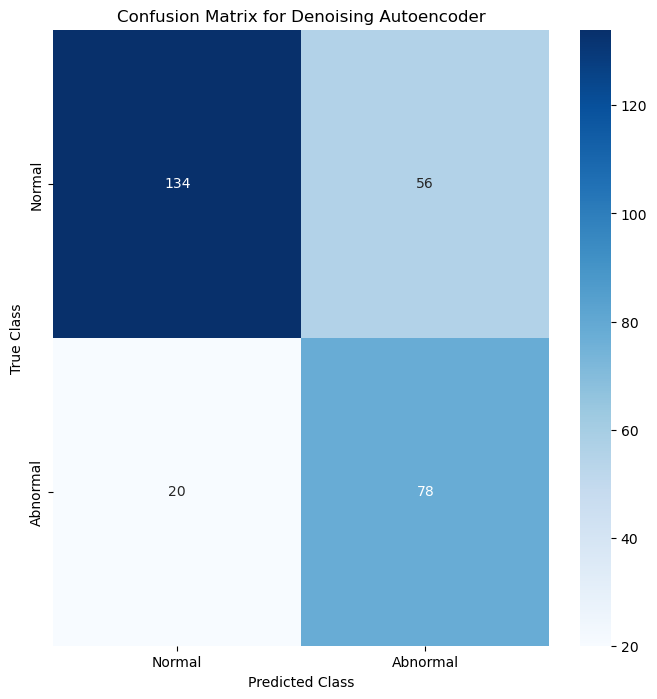

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       190
           1       0.58      0.80      0.67        98

    accuracy                           0.74       288
   macro avg       0.73      0.75      0.73       288
weighted avg       0.77      0.74      0.74       288



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#혼동 행렬 및 분류 리포트 출력
conf_matrix = confusion_matrix(error_df.true_class, error_df.denoising_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title("Confusion Matrix for Denoising Autoencoder")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

print(classification_report(error_df.true_class, error_df.denoising_pred))